In [46]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
data = pd.read_csv('scale_features_df.csv')

In [48]:
data_undated = data.drop(['time'],axis=1)
data_undated

,close_gold,close_btc,close_eth,close_bnb,close_ada,close_xrp,close_euro,close_pound,close_yen
0,0.000000,0.003690,0.000000,0.000000,0.000000,0.000000,0.023753,0.285912,0.990903
1,0.005536,0.003949,0.000306,0.000000,0.000000,0.000000,0.000000,0.271720,1.000000
2,0.019919,0.005575,0.000643,0.000000,0.000000,0.000000,0.039905,0.301488,0.967511
3,0.033433,0.003249,0.000432,0.000000,0.000000,0.000000,0.095962,0.334718,0.844055
4,0.032510,0.001605,0.000428,0.000000,0.000000,0.000000,0.060333,0.289027,0.950617
...,...,...,...,...,...,...,...,...,...
1228,0.664152,0.671308,0.709449,0.537761,0.700809,0.537761,0.629454,0.766009,0.458090
1229,0.682280,0.636008,0.659971,0.508764,0.668801,0.508764,0.627553,0.764971,0.445744
1230,0.681140,0.681673,0.736398,0.560270,0.760782,0.560270,0.612827,0.751471,0.484081
1231,0.655739,0.702665,0.754563,0.567320,0.785040,0.567320,0.636105,0.786085,0.517869


In [49]:
X= data_undated.drop(['close_btc'],axis=1)
y= data_undated['close_btc']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
model1 = XGBRegressor()
model2 =  DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error

model_pipeline = [model1, model2]
model_names = [ 'XGB', 'Decision Tree Regressor']
scores = {}
scores_mae={}
val_scores= {}
val_scores_mae= {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    model.fit(X_train, y_train)
    scores[model_names[i]] = mean_score
    prediction=model.predict(X_test)
    scores_mae[model_names[i]] = mean_absolute_error(y_test, prediction)
    val_scores[model_names[i]] = model.score(X_test,y_test)
    i = i+1
print(scores)
print(val_scores)
print(scores_mae)

{'XGB': 0.9814629530278033, 'Decision Tree Regressor': 0.9725370990359448}
{'XGB': 0.9884616068884152, 'Decision Tree Regressor': 0.9794204384403746}
{'XGB': 0.010231487506237293, 'Decision Tree Regressor': 0.011829402782048859}


In [52]:
model3 = LinearRegression()
model4 = KNeighborsRegressor()
from sklearn.metrics import mean_absolute_error
model_pipeline = [model3, model4]
model_names = ['Linear Regression', 'KNN']
scores = {}
scores_rmse={}
val_scores= {}
val_scores_rmse= {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    model.fit(X_train, y_train)
    scores[model_names[i]] = mean_score
    prediction=model.predict(X_test)
    scores_mae[model_names[i]] = mean_absolute_error(y_test, prediction)
    val_scores[model_names[i]] = model.score(X_test,y_test)
    
    i = i+1
print('scores: ',scores)
print('cross validation scores: ',val_scores)
print('rmse scores: ',scores_mae)

scores:  {'Linear Regression': 0.8740177245460078, 'KNN': 0.9906142890723088}
cross validation scores:  {'Linear Regression': 0.8643319332506809, 'KNN': 0.9934322905902847}
rmse scores:  {'XGB': 0.010231487506237293, 'Decision Tree Regressor': 0.011829402782048859, 'Linear Regression': 0.0541261274134293, 'KNN': 0.0113408045441198}


In [53]:
model5 =  RandomForestRegressor()

from sklearn.metrics import mean_absolute_error
model_pipeline = [model5]
model_names = ['Random Forest Regressor']
scores = {}
scores_mae={}
val_scores= {}
val_scores_mae= {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    model.fit(X_train, y_train)
    scores[model_names[i]] = mean_score
    prediction=model.predict(X_test)
    scores_mae[model_names[i]] = mean_absolute_error(y_test, prediction)
    val_scores[model_names[i]] = model.score(X_test,y_test)
    val_scores_mae[model_names[i]]= mean_absolute_error(y_test, prediction)
    i = i+1
print(scores)
print(val_scores)
print(scores_mae)
print(val_scores_mae)

{'Random Forest Regressor': 0.9793014056475172}
{'Random Forest Regressor': 0.9898956707431512}
{'Random Forest Regressor': 0.010210272570908837}
{'Random Forest Regressor': 0.010210272570908837}


In [54]:
XGB_btc = model1.predict(X_test)
DTR_btc = model2.predict(X_test)
LR_btc = model3.predict(X_test)
KNR_btc = model4.predict(X_test)
RFR_btc = model5.predict(X_test)


In [59]:
X_test['XGB'] = XGB_btc
X_test['DTR'] = DTR_btc
X_test['LR'] = LR_btc
X_test['KNR'] = KNR_btc
X_test['RFR'] = RFR_btc

/var/folders/x0/lydc794d7tjbpf7r4sygzwrw0000gn/T/ipykernel_7687/2287605780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['XGB'] = XGB_btc
/var/folders/x0/lydc794d7tjbpf7r4sygzwrw0000gn/T/ipykernel_7687/2287605780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['DTR'] = DTR_btc
/var/folders/x0/lydc794d7tjbpf7r4sygzwrw0000gn/T/ipykernel_7687/2287605780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [61]:
pred_act = X_test[['XGB', 'DTR', 'LR', 'KNR', 'RFR']]

In [66]:
pred_act2 = pred_act.reset_index()

In [67]:
df_to_concat = data[['time', 'close_btc']]
df_to_concat2 = df_to_concat.reset_index()

In [68]:
predVSact = pd.merge(left= df_to_concat2, left_on='index',
        right = pred_act2  , right_on='index')

In [72]:
predVSact = predVSact.drop(['index'], axis=1)
predVSact

,time,close_btc,XGB,DTR,LR,KNR,RFR
0,2017-01-03,0.003949,0.002839,0.000000,-0.045989,0.002553,0.001004
1,2017-01-09,0.001822,0.001882,0.001895,-0.033828,0.003451,0.001544
2,2017-01-12,0.000393,0.001519,0.000628,-0.021561,0.004596,0.000725
3,2017-01-16,0.000668,0.001507,0.000000,-0.022517,0.005454,0.000591
4,2017-01-20,0.001712,0.001781,0.001749,-0.014121,0.003209,0.001957
...,...,...,...,...,...,...,...
242,2021-08-26,0.733863,0.753767,0.768021,0.792676,0.752708,0.750906
243,2021-09-03,0.784319,0.782702,0.826914,0.906911,0.774646,0.793899
244,2021-09-16,0.748395,0.742254,0.773437,0.824401,0.734943,0.758919
245,2021-09-17,0.740964,0.740186,0.773437,0.788773,0.713621,0.743351


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime as dt


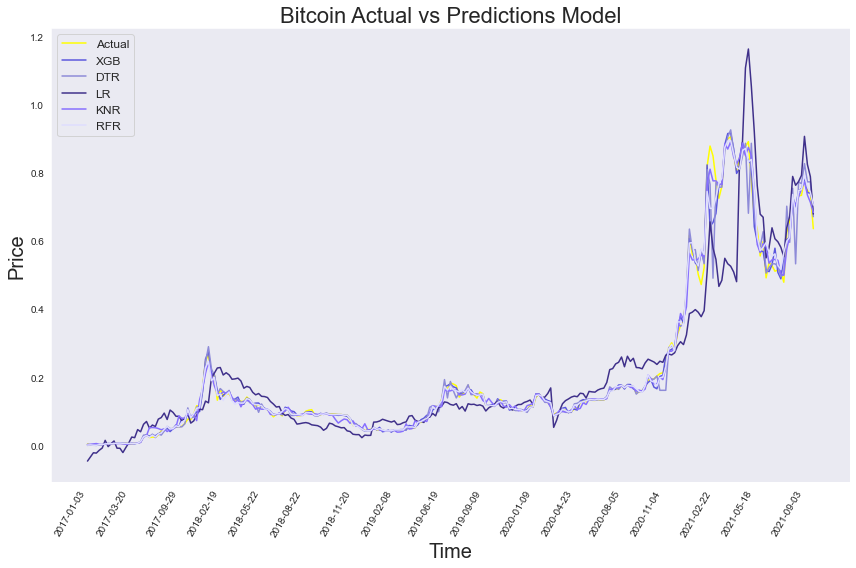

In [99]:
fig = plt.figure(figsize= (12,8))
plot1 = sns.lineplot(x='time', y='close_btc', data= predVSact, color='yellow')
plot2 = sns.lineplot(x='time', y='XGB', data= predVSact, color='#5b57de')
plot3 = sns.lineplot(x='time', y='DTR', data= predVSact, color='#8e8bd8')
plot4 = sns.lineplot(x='time', y='LR', data= predVSact, color='#3f308a')
plot5 = sns.lineplot(x='time', y='KNR', data= predVSact, color='#876fff')
plot6 = sns.lineplot(x='time', y='RFR', data= predVSact, color='#dfdeff')

plt.title(f'Bitcoin Actual vs Predictions Model', fontsize = 22)
plt.ylabel("Price", size = 20)
plt.xlabel('Time', size = 20)
plt.legend(labels=["Actual", "XGB", "DTR", "LR", "KNR", "RFR"],fontsize = 'large')
sns.set_style("dark")

plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,15)))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()




plt.show()

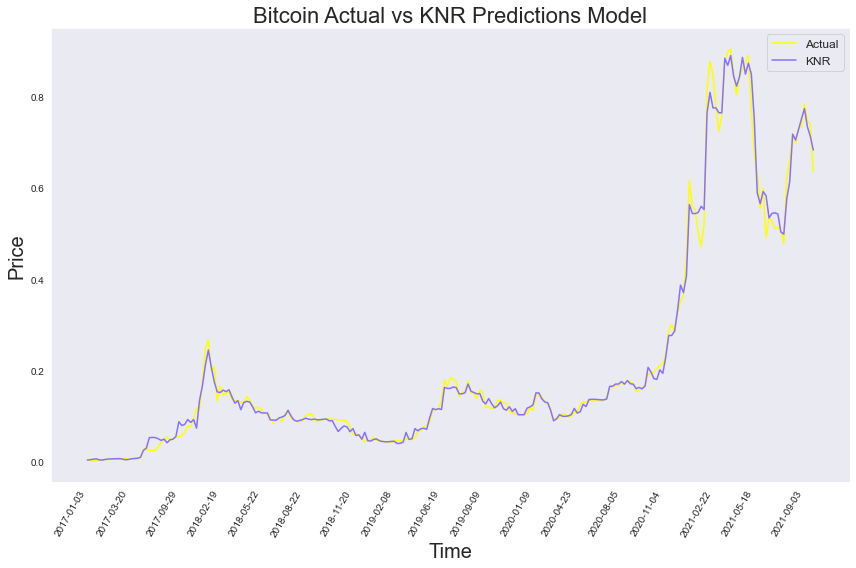

In [98]:
fig = plt.figure(figsize= (12,8))
plot1 = sns.lineplot(x='time', y='close_btc', data= predVSact, color='yellow')
#plot2 = sns.lineplot(x='time', y='XGB', data= predVSact, color='#5b57de')
#plot3 = sns.lineplot(x='time', y='DTR', data= predVSact, color='#8e8bd8')
#plot4 = sns.lineplot(x='time', y='LR', data= predVSact, color='#3f308a')
plot5 = sns.lineplot(x='time', y='KNR', data= predVSact, color='#876fff')
#plot6 = sns.lineplot(x='time', y='RFR', data= predVSact, color='#dfdeff')

plt.title(f'Bitcoin Actual vs KNR Predictions Model', fontsize = 22)
plt.ylabel("Price", size = 20)
plt.xlabel('Time', size = 20)
plt.legend(labels=["Actual","KNR"],fontsize = 'large')
sns.set_style("dark")

plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,15)))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()

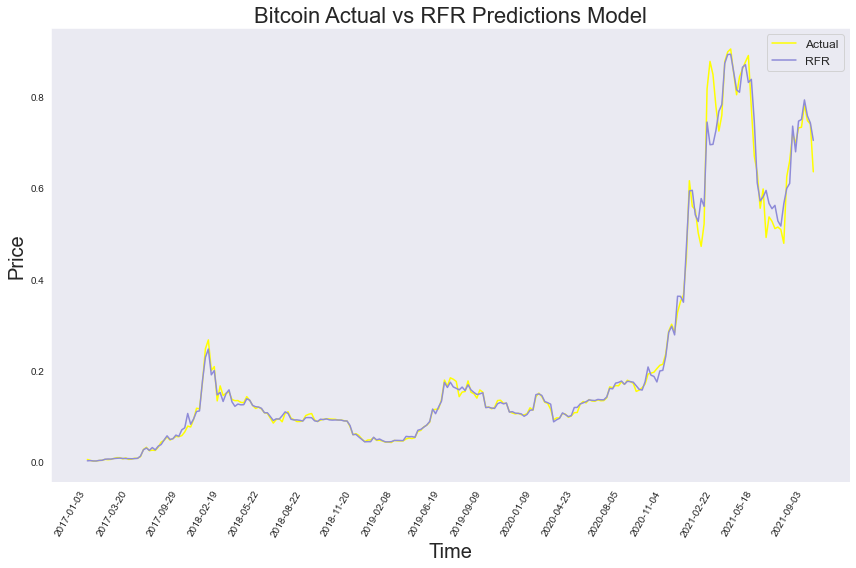

In [97]:
fig = plt.figure(figsize= (12,8))
plot1 = sns.lineplot(x='time', y='close_btc', data= predVSact, color='yellow')
#plot2 = sns.lineplot(x='time', y='XGB', data= predVSact, color='#5b57de')
#plot3 = sns.lineplot(x='time', y='DTR', data= predVSact, color='#8e8bd8')
#plot4 = sns.lineplot(x='time', y='LR', data= predVSact, color='#3f308a')
#plot5 = sns.lineplot(x='time', y='KNR', data= predVSact, color='#876fff')
plot6 = sns.lineplot(x='time', y='RFR', data= predVSact, color='#8e8bd8')

plt.title(f'Bitcoin Actual vs RFR Predictions Model', fontsize = 22)
plt.ylabel("Price", size = 20)
plt.xlabel('Time', size = 20)
plt.legend(labels=["Actual", "RFR"],fontsize = 'large')
sns.set_style("dark")

plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,15)))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()